Process images JSON input

In [ ]:
pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.15.0


### Get an example dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


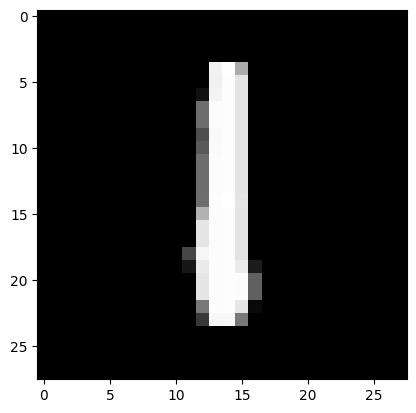

In [ ]:
import matplotlib.pyplot as plt

IMG_INDEX = 1011

# Reshape the image from a 28x28 NumPy array to a 28x28 pixel format
image = train_images[IMG_INDEX]

# Display the image using matplotlib
plt.imshow(image, cmap="gray")
plt.show()

In [ ]:
train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

In [ ]:
print(train_images.shape)

# 2D [28,28] ->  1D [1, 784]
train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

train_images.shape

(1000, 784)


(1000, 784)

Create model

In [ ]:
# Define a simple sequential model
def create_model():
  model = tf.keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### New high-level .keras format

In [ ]:

model.fit(train_images, train_labels, epochs=5)

# Save the entire model as a `.keras` zip archive.
model.save('my_model.keras')

Epoch 1/5
32/32 [==============================] - 3s 4ms/step - loss: 1.1704 - sparse_categorical_accuracy: 0.6620
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.4167 - sparse_categorical_accuracy: 0.8780
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.2674 - sparse_categorical_accuracy: 0.9290
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.2056 - sparse_categorical_accuracy: 0.9500
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.1512 - sparse_categorical_accuracy: 0.9660


In [ ]:
new_model = tf.keras.models.load_model('my_model.keras')

# Show the model architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### HDF5 format

In [ ]:
# Create and train a new model instance.
model = create_model()
model.fit(train_images, train_labels, epochs=10)

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('my_model.h5')

Epoch 1/10
32/32 [==============================] - 1s 3ms/step - loss: 2.2925 - sparse_categorical_accuracy: 0.1770
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 2.2595 - sparse_categorical_accuracy: 0.2870
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 2.2059 - sparse_categorical_accuracy: 0.3420
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 2.1255 - sparse_categorical_accuracy: 0.4780
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 2.0197 - sparse_categorical_accuracy: 0.4880
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 1.8944 - sparse_categorical_accuracy: 0.5250
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 1.7626 - sparse_categorical_accuracy: 0.5890
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 1.6297 - sparse_categorical_accuracy: 0.6220
Epoch 9/10
32/32 [==============================] - 0s 3ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Mock dump test images to json

In [ ]:
import json
import numpy as np

test_images_json = test_images[:100]
test_labels_json = test_labels[:100]

def save_images_to_json(images, labels, filename):
  json_data = []
  for image, label in zip(images, labels):
    json_data.append({
      "features": image.tolist(),
      "label": int(label),
    })
  with open(filename, "w") as f:
    json.dump(json_data, f, indent=2)

save_images_to_json(test_images_json, test_labels_json, "test_images.json")

### Load model

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Load data

In [ ]:
# Define function to load data from JSON
def load_json_data(filepath):
  with open(filepath, "r") as f:
    data = json.load(f)
  features = []
  labels = []
  for sample in data:
    features.append(sample["features"])
    labels.append(sample["label"])
  return tf.convert_to_tensor(features), tf.convert_to_tensor(labels)

features, labels = load_json_data("test_images.json")

# plt.imshow(features[:1], cmap="gray")
# plt.show()

loss, accuracy = model.evaluate(features, labels)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")

4/4 [==============================] - 0s 3ms/step - loss: 1.3588 - sparse_categorical_accuracy: 0.7100
Loss: 1.3588
Accuracy: 0.7100


In [ ]:

predictions = model.predict(features)

# Optionally, extract predicted labels based on your model output format
predicted_labels = [int(prediction.argmax()) for prediction in predictions]

# Print or use the predictions and labels as needed
print(f"Predictions: {predicted_labels}")

4/4 [==============================] - 0s 2ms/step
Predictions: [7, 2, 1, 0, 4, 1, 7, 7, 0, 7, 0, 0, 7, 0, 1, 3, 7, 7, 2, 7, 7, 6, 7, 1, 7, 0, 7, 4, 0, 1, 3, 1, 3, 0, 7, 2, 7, 1, 1, 1, 1, 7, 7, 1, 1, 3, 1, 1, 4, 4, 6, 0, 7, 3, 0, 0, 4, 1, 7, 1, 7, 0, 7, 1, 7, 1, 7, 4, 3, 0, 7, 0, 0, 1, 1, 7, 1, 7, 1, 7, 7, 6, 2, 7, 1, 4, 7, 3, 6, 1, 3, 6, 1, 3, 1, 4, 1, 1, 0, 7]


In [ ]:
print(type(train_images))
print(type(features))

<class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
